In [1]:
#Import necessary libraries for project
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Import ML models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [2]:
#Read csv
df = pd.read_csv('/Users/eugeniomurillo/Downloads/startup_data.csv')

In [3]:
#Take a look at number of rows, columns
df.shape

(923, 49)

In [4]:
#Get some information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:
#First looks into df, with view of ALL columns
pd.set_option("display.max_columns",None)
df.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,1/1/2002,2/15/2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,CA,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,1/1/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,1/1/2004,NaN,8/24/2005,10/4/2010,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,CA,1,0,0,0,0,finance,0,0,0,0,0,0,0,0,0,1,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,1/1/2002,NaN,8/2/2005,2/8/2013,3.5863,11.1123,8.0055,9.9945,13,3,9650000,4,MA,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,6/1/2005,NaN,2/1/2007,2/5/2010,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:498,1,1,1,0,0,0,1.0000,1,acquired


In [6]:
#Check for missing values in columns
df.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [7]:
#Check for duplicated data in name column which should be unique
duplicates = df.duplicated(subset=['name'], keep=False)
duplicated_name = df[duplicates].sort_values('name')
print(duplicated_name[['name', 'state_code.1', 'category_code','funding_total_usd']])


                name state_code.1 category_code  funding_total_usd
124  Redwood Systems           CA     cleantech           34250000
832  Redwood Systems           CA     cleantech           34250000


In [8]:
#Drop duplicated row by index 124
df = df.drop([124])

In [9]:
#Check for different values in status column before transforming it to numerical
df['status'].value_counts()

acquired    596
closed      326
Name: status, dtype: int64

In [10]:
# Transform 'status' to numerical so we can use column for prediction 
df['status'] = df['status'].map({'acquired':1, 'closed':0})
# Change dtype to int 
df['status'].astype(int)

0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: status, Length: 922, dtype: int64

In [11]:
#Check if labels column is the same as status column but numerical, if it is we can drop labels
for index,row in df.iterrows():
    if row['labels'] != row['status']:
        print(index, row['labels'], row['status'])
    
    

In [12]:
#Change 'object_id' and 'id' columns to numerical
df['object_id'] = df['object_id'].str.replace("c:", '').astype(int)
df['id'] = df['id'].str.replace("c:", '').astype(int)

In [13]:
#Drop labels, closed_at and Unnamed: 6, Unnamed: 0 column due to missing values
#And due to incongruence with analysis
df.pop('labels')
df.pop('closed_at')
df.pop('Unnamed: 6')
df.pop('Unnamed: 0')
df.shape

(922, 45)

In [14]:
#Filter values that are negative,0 or na because they don't make sense 
filtered_df_first = df[(df['age_first_milestone_year'] <= 0) | (df['age_first_milestone_year'].isna())]
print(filtered_df_first['age_first_milestone_year'])

11    -0.6164
12        NaN
15        NaN
17    -0.4986
22     0.0000
        ...  
903       NaN
904       NaN
905   -7.0055
906       NaN
912       NaN
Name: age_first_milestone_year, Length: 243, dtype: float64


In [15]:
#Check how are the 243 values distributed, 152 are na and 91 are 0 or negative
filtered_df_first['age_first_milestone_year'].isna().value_counts()

True     152
False     91
Name: age_first_milestone_year, dtype: int64

In [16]:
#Replace negatives, 0's and Na's with column mean 
mean_val_first = df[df['age_first_milestone_year'] >= 0]['age_first_milestone_year'].mean()
print(mean_val_first)

3.3415541436464116


In [17]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].apply(lambda x: mean_val_first if x < 0 or pd.isnull(x) else x)

In [18]:
#Check if values were replaced correctly with .mode()
print(df['age_first_milestone_year'].mode())

0    3.341554
Name: age_first_milestone_year, dtype: float64


In [19]:
#Repeat same steps with 'age_last_milestone_year' column
filtered_df_last = df[(df['age_last_milestone_year'] <= 0) | (df['age_last_milestone_year'].isna())]
mean_val_last = df[df['age_last_milestone_year'] >= 0]['age_last_milestone_year'].mean()
print(mean_val_last)

4.862969788918209


In [20]:
#Replace negatives, 0's and Na's with column mean
df['age_last_milestone_year'] = df['age_last_milestone_year'].apply(lambda x: mean_val_last if x < 0 or pd.isnull(x) else x)
print(df['age_last_milestone_year'].mode())

0    4.86297
Name: age_last_milestone_year, dtype: float64


In [21]:
df.shape

(922, 45)

In [22]:
df.isna().sum()

state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
name                        0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                1
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consult

In [23]:
#Fix missing value in 'state_code.1' column
df.loc[df['state_code.1'].isnull()]

,state_code,latitude,longitude,zip_code,id,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
515,CA,37.451124,-122.166264,94025,856,Menlo Park,Cuil,1/1/2005,3/1/2007,4/15/2008,2.1616,3.2877,3.4986,7.6904,13,2,33000000,4,NaN,0,0,0,0,0,search,0,0,0,0,0,0,0,0,0,1,856,0,0,1,1,0,0,2.5,1,0


In [24]:
#Fix missing value in 'state_code.1' column by adding values to nan columns
df.loc[515,'state_code.1'] = 'CA'
df.loc[515,'is_CA'] = 1

In [25]:
#Check the new df with changes made
df.head(10)

,state_code,latitude,longitude,zip_code,id,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,6669,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,6669,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,95032,16283,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,16283,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,92121,65620,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,65620,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,95014,42668,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,42668,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,94105,65806,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,65806,1,1,0,0,0,0,1.0000,1,0
5,CA,37.406914,-122.090370,94043,22898,Mountain View,Matisse Networks,1/1/2002,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,CA,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,22898,0,0,0,1,0,0,3.0000,1,0
6,CA,37.391559,-122.070264,94041,16191,Mountain View,RingCube Technologies,1/1/2005,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,16191,1,0,1,1,0,0,1.6667,1,1
7,CA,38.057107,-122.513742,94901,5192,San Rafael,ClairMail,1/1/2004,8/24/2005,10/4/2010,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,CA,1,0,0,0,0,finance,0,0,0,0,0,0,0,0,0,1,5192,0,0,1,1,0,1,3.5000,1,1
8,MA,42.712207,-73.203599,1267,1043,Williamstown,VoodooVox,1/1/2002,8/2/2005,2/8/2013,3.5863,11.1123,8.0055,9.9945,13,3,9650000,4,MA,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,1043,1,0,1,0,0,1,4.0000,1,1
9,CA,37.427235,-122.145783,94306,498,Palo Alto,Doostang,6/1/2005,2/1/2007,2/5/2010,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,498,1,1,1,0,0,0,1.0000,1,1


In [26]:
#Last check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 922
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                922 non-null    object 
 1   latitude                  922 non-null    float64
 2   longitude                 922 non-null    float64
 3   zip_code                  922 non-null    object 
 4   id                        922 non-null    int64  
 5   city                      922 non-null    object 
 6   name                      922 non-null    object 
 7   founded_at                922 non-null    object 
 8   first_funding_at          922 non-null    object 
 9   last_funding_at           922 non-null    object 
 10  age_first_funding_year    922 non-null    float64
 11  age_last_funding_year     922 non-null    float64
 12  age_first_milestone_year  922 non-null    float64
 13  age_last_milestone_year   922 non-null    float64
 14  relationsh

In [27]:
df.shape

(922, 45)

In [28]:
#Save cleaned data
df.to_csv('data_cleaned.csv')

In [29]:
#Import cleaned data
startups = pd.read_csv('data_cleaned.csv', index_col=0)
startups.head()

,state_code,latitude,longitude,zip_code,id,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,6669,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,6669,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,95032,16283,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,16283,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,92121,65620,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,65620,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,95014,42668,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,42668,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,94105,65806,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,65806,1,1,0,0,0,0,1.0000,1,0


In [30]:
startupsnum = startups.select_dtypes(include = 'number').copy()

In [31]:
#EDA 
#Relationship analysis with variable to be predicted 'status'
startups_top_corr = startupsnum.corrwith(startupsnum['status']).sort_values(ascending=False)[:15]
startups_corr_df = startupsnum[startups_top_corr.index].corr()
startups_corr_df[['status']]


,status
status,1.000000
relationships,0.359993
milestones,0.328264
is_top500,0.310394
age_last_milestone_year,0.219144
has_roundB,0.207495
funding_rounds,0.205301
avg_participants,0.186309
has_roundA,0.183669
has_roundC,0.164790


Relationship between 'status' and the 15 strongest variables based on correlation.

<Axes: >

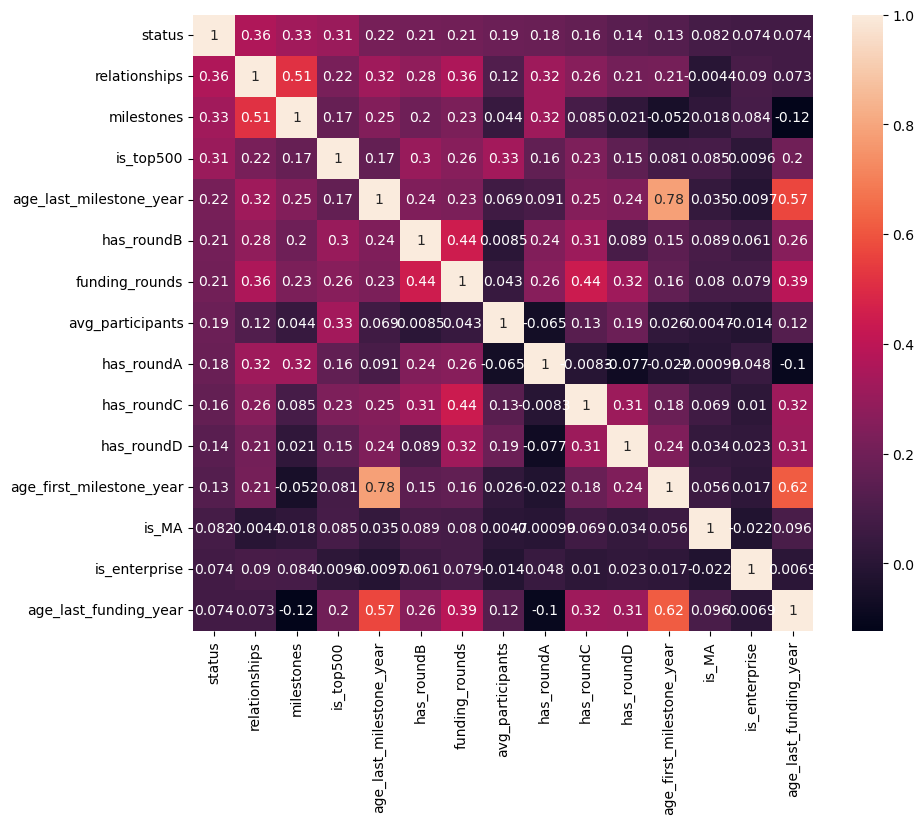

In [32]:
#Heatmap of the 15 highest correlations
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(startups_corr_df, xticklabels=startups_corr_df.columns,
            yticklabels=startups_corr_df.columns, annot=True,
           annot_kws={"fontsize": 10}, ax=ax)


We create a heatmap to visualize the relationship between 'status' and the 15 highest correlations, we notice there is a strong correlation between 'age_first_milestone_year' 'and age_last_milestone_year' so we deepdive into it. 

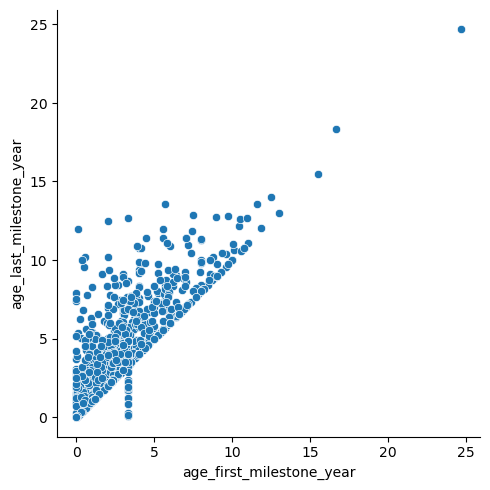

In [33]:
#There is a strong correlation between 'age_first_milestone_year' 'and age_last_milestone_year'
#Create a scatterplot to visualize
sns.relplot(x='age_first_milestone_year', y='age_last_milestone_year', data=startups, kind='scatter' )

We can see this relationship is due to some startups having the same 'age_first_milestone_year' and 'and age_last_milestone_year', which means they only ever reached 1 milestone. This might be not important for our analysis, however we will decide in the modeling section which features to drop. 

## use all features and based on model decide. Dont delete before model. 
## add markdown below plots 
## dont select variables based on correlation

In [34]:
#Pandas profiling for EDA
#profiling = ProfileReport(startups)
#profiling.to_file(output_file='output.html')

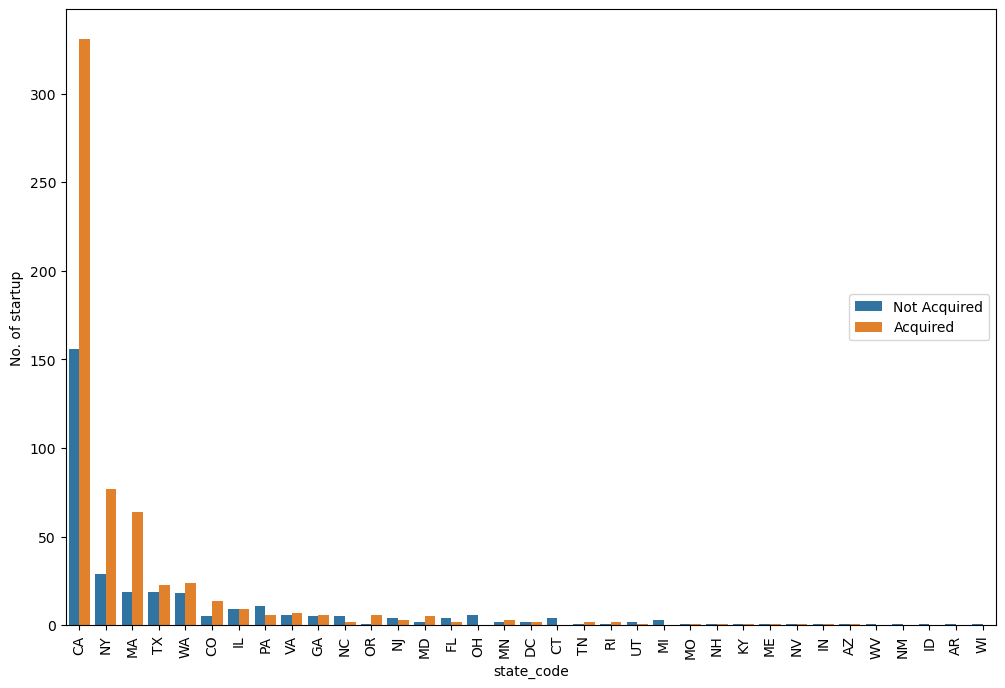

In [35]:
# Plot states with most startups
fig, ax = plt.subplots(figsize=(12,8))

#hue 'status' to see proportionality on aqcuired vs not acquired
sns.countplot(x="state_code", hue="status", data=startups,
              order=startups.state_code.value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="state_code", ylabel="No. of startup")
ax.legend(loc='center right', labels=['Not Acquired', 'Acquired'])

We can see that the states with more startups are CA, NY, MA and TX. This involves startups Acquired and Not Acquired. We deepdive into the top states to see the details on the # of startups.

In [36]:
#Success rate and count of  based on state
success_state = startups.groupby('state_code').agg({'status': ['mean', lambda x: (x == 1).sum(), lambda x: (x == 0).sum()], 'name': 'count'}).sort_values(by=('status', 'mean'), ascending=False)[:10].reset_index()
success_state.columns = ['state_code', 'success_rate', 'Acquired', 'Not Acquired', 'total_count']
success_state['success_rate'] = success_state['success_rate']*100
success_state['success_rate'] = success_state['success_rate'].apply(lambda x: '{:.2f}%'.format(x))
success_state= success_state.sort_values(by='total_count',ascending=False).reset_index().iloc[:,1:]
success_state= success_state[['state_code', 'Acquired', 'Not Acquired','total_count','success_rate'  ]]
success_state

,state_code,Acquired,Not Acquired,total_count,success_rate
0,CA,331,156,487,67.97%
1,NY,77,29,106,72.64%
2,MA,64,19,83,77.11%
3,WA,24,18,42,57.14%
4,CO,14,5,19,73.68%
5,OR,6,1,7,85.71%
6,MD,5,2,7,71.43%
7,MN,3,2,5,60.00%
8,RI,2,1,3,66.67%
9,TN,2,1,3,66.67%


We can see the detail of the states and the total # of startups Acquired or Not Acquired. We create a summary statistic named 'success_rate' which determines # startups succesful in each state. 

In [37]:
#select categorical variables only
startups_cat = startups.select_dtypes(include = 'object').copy()
startups_cat.head(3)

,state_code,zip_code,city,name,founded_at,first_funding_at,last_funding_at,state_code.1,category_code
0,CA,92101,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,CA,music
1,CA,95032,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,CA,enterprise
2,CA,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,CA,web


[Text(0.5, 0, 'state_code'), Text(0, 0.5, '# Startups')]

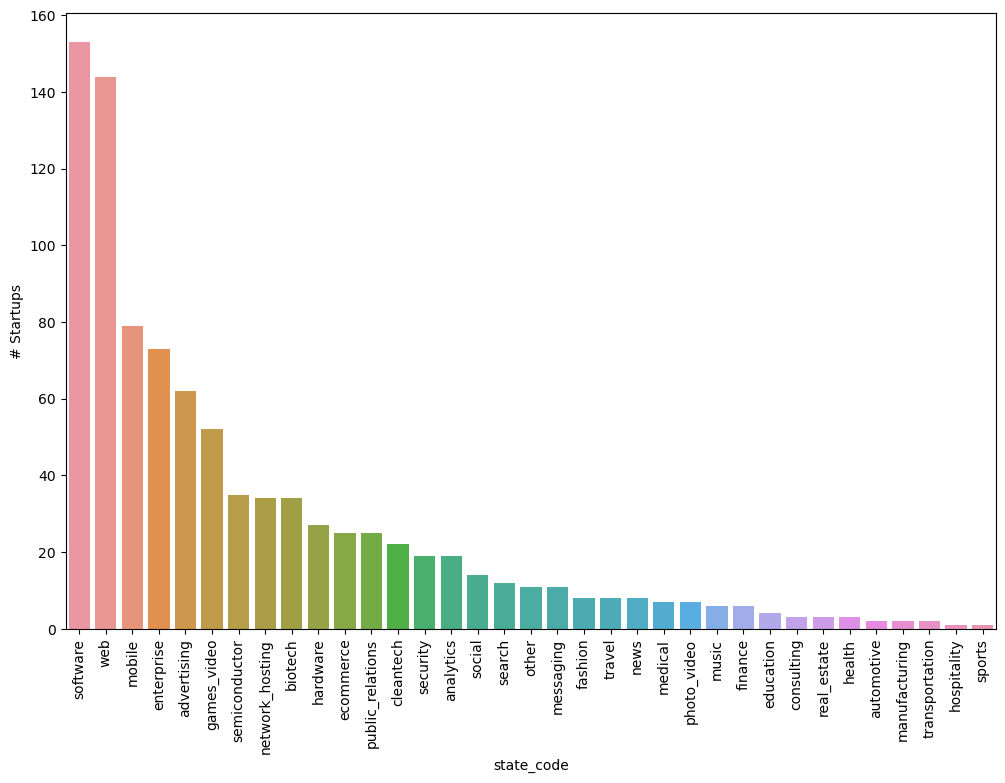

In [38]:
# Plot industries with most startups 
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="category_code", data=startups_cat, order=startups['category_code'].value_counts().index
              )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="state_code", ylabel="# Startups",)


We can see that the industries with the most startups belong to software, web, mobile, enterprise. This gives us insight about the technology industry being the most important when it comes to startups. Let's see the success rate based on industry. 

In [39]:
#Success rate and count of Acquired based on category_code
success_code = startups.groupby('category_code').agg({'status': ['mean', lambda x: (x == 1).sum(), lambda x: (x == 0).sum()], 'name': 'count'}).sort_values(by=('name', 'count'), ascending=False)[:10].reset_index()
success_code.columns = ['category_code', 'success_rate', 'Acquired', 'Not Acquired', 'total_count']
success_code['success_rate'] = success_code['success_rate']*100
success_code['success_rate'] = success_code['success_rate'].apply(lambda x: '{:.2f}%'.format(x))
success_code= success_code.sort_values(by='total_count',ascending=False).reset_index().iloc[:,1:]
success_code= success_code[['category_code', 'Acquired', 'Not Acquired','total_count','success_rate'  ]]
success_code

,category_code,Acquired,Not Acquired,total_count,success_rate
0,software,101,52,153,66.01%
1,web,93,51,144,64.58%
2,mobile,52,27,79,65.82%
3,enterprise,56,17,73,76.71%
4,advertising,45,17,62,72.58%
5,games_video,31,21,52,59.62%
6,semiconductor,24,11,35,68.57%
7,network_hosting,24,10,34,70.59%
8,biotech,22,12,34,64.71%
9,hardware,11,16,27,40.74%


We add the 'success_rate' statistic which represents the % of Acquired startups, we can see posistive numbers for most of the tech industry, with advertising having the highest 'success_rate'. 

In [40]:
#select numerical variables only without dummies, latitude, longitude, ids. 
startups_num = startups.select_dtypes(include = ['int64','float64']).copy()
startups_num.head(3)
num_features= ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants']

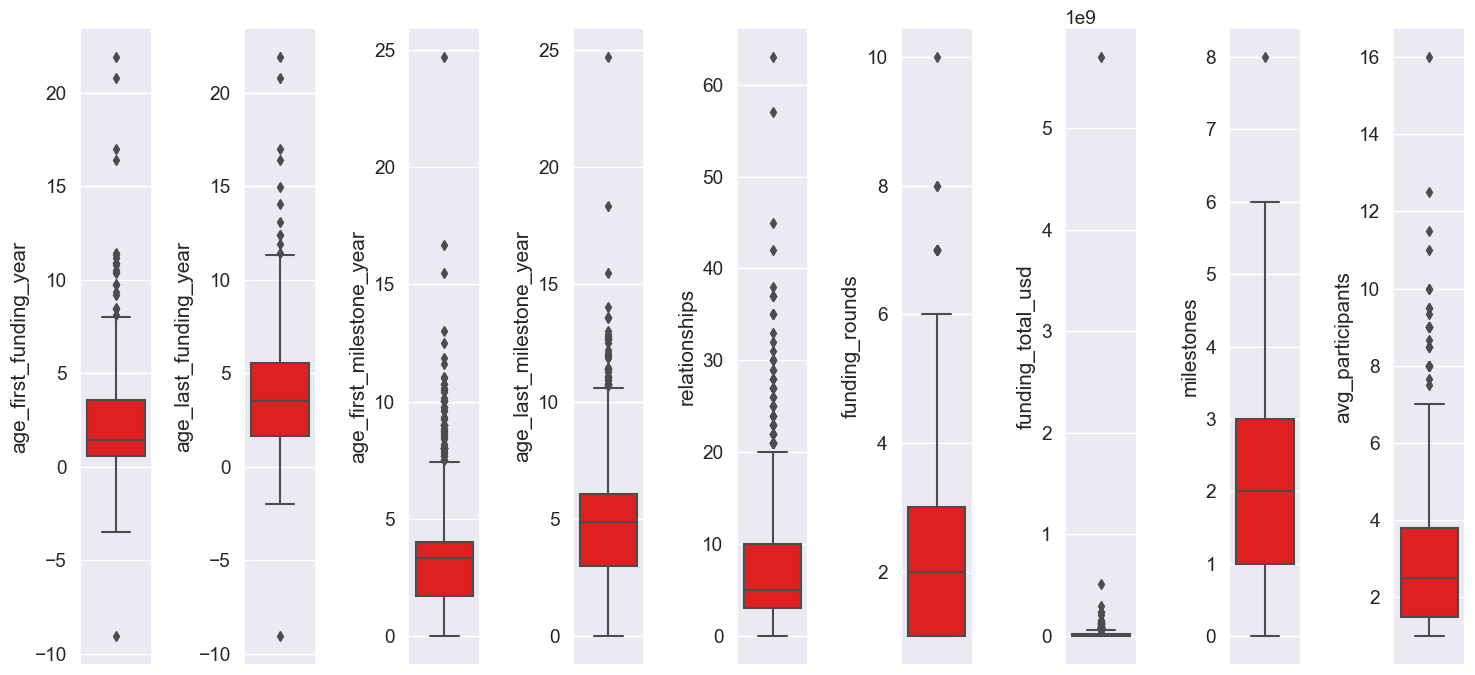

In [41]:
#Box plots with most top states
sns.set(font_scale=1.25)
plt.figure(figsize=(15,7))
for i in range (0, len(num_features)):
    plt.subplot(1,len(num_features), i+1)
    sns.boxplot(y=startups[num_features[i]], color='red')
    plt.tight_layout()

We create this boxplot so we can visualize some summary statistics and outliers of each of the numerical variables. 

In [42]:
df.status.value_counts(normalize=True)*100


1    64.642082
0    35.357918
Name: status, dtype: float64

# MODELING

In [43]:
#Import ML models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
#from sklearn.learning_curve import validation_curve

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [44]:
#Create new df1 to scale data without altering the original df
df1 = pd.read_csv('data_cleaned.csv', index_col=0)
df1.head(5)

,state_code,latitude,longitude,zip_code,id,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,6669,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,6669,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,95032,16283,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,16283,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,92121,65620,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,65620,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,95014,42668,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,42668,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,94105,65806,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,65806,1,1,0,0,0,0,1.0000,1,0


In [45]:
object_columns = df1.select_dtypes(include=['object'])
object_columns.head(2)

,state_code,zip_code,city,name,founded_at,first_funding_at,last_funding_at,state_code.1,category_code
0,CA,92101,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,CA,music
1,CA,95032,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,CA,enterprise


In [46]:
object_columns.dtypes

state_code          object
zip_code            object
city                object
name                object
founded_at          object
first_funding_at    object
last_funding_at     object
state_code.1        object
category_code       object
dtype: object

In [47]:
#Drop categorical columns which are already represented as dummy
df1 = df1.drop(columns=object_columns)

In [48]:
#Drop 'object_id' column which represents the same as 'id'
df1= df1.drop(columns='object_id')

In [49]:
df1.shape

(922, 35)

In [50]:
#Create train and test split data 
X = df1.drop(columns='status')
y = df1['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8 ,random_state=123)
print('Training split has', X_train.shape[0], 'rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(y_train)) + ')')
print('Test split has', X_test.shape[0], 'rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(y_test)) + ')')

Training split has 737 rows
 and the corresponding labels have an equal number of values. (737)
Test split has 185 rows
 and the corresponding labels have an equal number of values. (185)


We create a 80/20 train/test split and verify it with this method. 

In [51]:
# Select columns with values greater than 1 in any row to separate from dummies
non_dummy_cols = df1.columns[(df1 > 1).any()]

In [52]:
#create new ss_df to make scale changes in a copy df
ss_df = df1.copy() #df1 contains the last general df without categorical columns
#Create train and test split data which is going to have scaled data
Xss= ss_df.drop(columns='status')
yss= ss_df['status']

Xss_train, Xss_test, yss_train, yss_test = train_test_split(Xss, yss, train_size= 0.8 ,random_state=123)
print('Training split has', Xss_train.shape[0], 'rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(yss_train)) + ')')
print('Test split has', Xss_test.shape[0], 'rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(yss_test)) + ')')

Training split has 737 rows
 and the corresponding labels have an equal number of values. (737)
Test split has 185 rows
 and the corresponding labels have an equal number of values. (185)


In [54]:
#Set up scaler and fit_transform train and test data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xss_train[non_dummy_cols])
X_test_scaled =scaler.transform(Xss_test[non_dummy_cols])

In [55]:
#Replace columns in train and test with scaled data 
Xss_train.loc[:, non_dummy_cols] = X_train_scaled
Xss_test.loc[:,non_dummy_cols] = X_test_scaled 

In [56]:
#Check for values >1 in the scaled dataset to see if it was appropiately applied
Xss_train.loc[Xss_train['funding_total_usd']>1]

,latitude,longitude,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
364,-2.118801,0.750803,-0.509696,0.955879,1.871291,0.742154,1.700792,1.534053,1.235262,26.799571,0.106775,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.755202,1
28,-2.217320,0.275065,0.186622,0.122536,0.220145,0.611957,0.271712,3.987428,1.961250,1.286725,0.106775,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,-0.586396,1
82,0.501662,-0.049105,0.600957,0.522845,0.025688,0.221323,-0.021558,-0.374128,-0.216713,2.281161,0.870787,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,-0.183917,1


In [57]:
yss_train

59     1
664    1
432    0
892    0
152    0
      ..
98     1
323    1
383    1
366    1
511    0
Name: status, Length: 737, dtype: int64

In [58]:
#Convert input data to contiguous arrays
#Xss_train = np.ascontiguousarray(Xss_train)
#yss_train = np.ascontiguousarray(yss_train)
#Xss_test = np.ascontiguousarray(Xss_test)
#yss_test = np.ascontiguousarray(yss_test)

use scaled data for:
logistic regression
KNN Classifier
SVM classifier (if you want to)

use original data for
decision tree
random forest
gradient boosting
xgboost

scaled: distance scaled models 
original: models dont depend on distance so observations dont need to be comparable 

evaluation metrics for all models: 
classification_report
confusion_matrix

## 1. Logistic Regression 

In [59]:
logreg = LogisticRegression(solver= 'liblinear', max_iter= 500, C = 1000)
logreg.fit(Xss_train, yss_train)

LogisticRegression(C=1000, max_iter=500, solver='liblinear')

Accuracy on training data: 0.78 

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.72      0.57      0.64       254
           1       0.80      0.88      0.84       483

    accuracy                           0.78       737
   macro avg       0.76      0.73      0.74       737
weighted avg       0.77      0.78      0.77       737



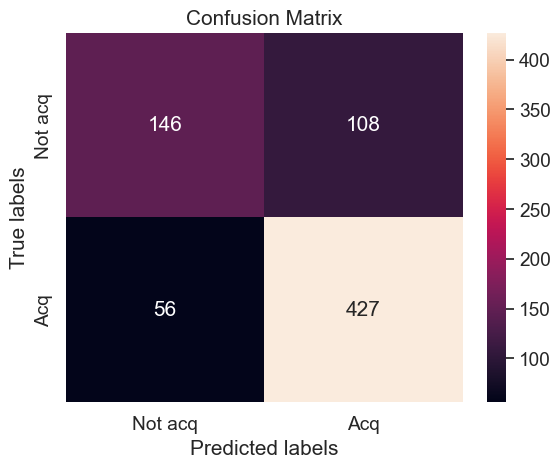

In [60]:
print(f'Accuracy on training data: {accuracy_score(yss_train,logreg.predict(Xss_train)):.2f}', '\n')
print("Classification Report for Training Data")
print(classification_report(yss_train, logreg.predict(Xss_train)))
cf_matrix_logreg_train = confusion_matrix(yss_train, logreg.predict(Xss_train))

#Create confusion matrix for train 
ax= plt.subplot()
sns.heatmap(cf_matrix_logreg_train, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not acq', 'Acq']); ax.yaxis.set_ticklabels(['Not acq', 'Acq']);

Accuracy on test data: 0.71 

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.66      0.54      0.60        72
           1       0.74      0.82      0.78       113

    accuracy                           0.71       185
   macro avg       0.70      0.68      0.69       185
weighted avg       0.71      0.71      0.71       185



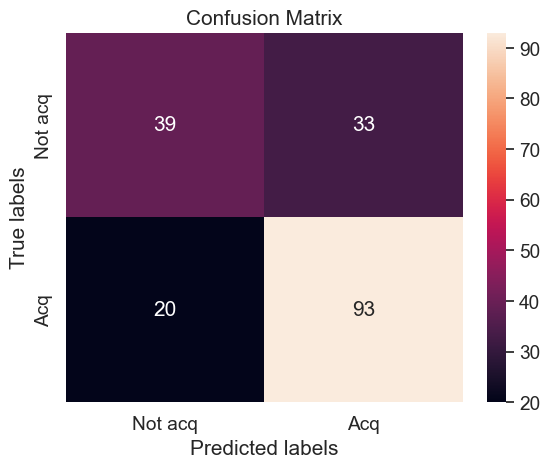

In [62]:
print(f'Accuracy on test data: {accuracy_score(yss_test ,logreg.predict(Xss_test)):.2f}', '\n')
print("Classification Report for Test Data")
print(classification_report(yss_test, logreg.predict(Xss_test)))
cf_matrix_logreg_test = confusion_matrix(yss_test, logreg.predict(Xss_test))
y_pred_logreg = logreg.predict(Xss_test)
#Create confusion matrix for test 
ax= plt.subplot()
sns.heatmap(cf_matrix_logreg_test, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not acq', 'Acq']); ax.yaxis.set_ticklabels(['Not acq', 'Acq']);

## 2. KNN Classifier

In [63]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(Xss_train.values , yss_train.values)
knn.score(Xss_train.values , yss_train.values)

0.8100407055630936

In [64]:
test_scores= []
train_scores= []

for i in range (1,10):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Xss_train.values , yss_train.values)
    
    train_scores.append(knn.score(Xss_train.values, yss_train.values))
    test_scores.append(knn.score(Xss_test.values, yss_test.values))

In [65]:
col_names = ['K', 'Train scores']
train_scores_df = pd.DataFrame({'K': ['1','2','3','4','5','6','7','8','9'], 'Train_Scores':train_scores})
train_scores_df.sort_values(by= 'Train_Scores', ascending=False)

,K,Train_Scores
0,1,1.000000
2,3,0.857531
1,2,0.841248
3,4,0.823609
4,5,0.810041
5,6,0.801900
6,7,0.791045
8,9,0.782904
7,8,0.778833


In [66]:
col_names_test = ['K', 'Test scores']
test_scores_df = pd.DataFrame({'K': ['1','2','3','4','5','6','7','8','9'], 'Test_Scores':test_scores})
test_scores_df.sort_values(by= 'Test_Scores', ascending=False)

,K,Test_Scores
4,5,0.729730
5,6,0.729730
7,8,0.718919
2,3,0.708108
6,7,0.708108
8,9,0.708108
3,4,0.697297
0,1,0.648649
1,2,0.621622


Accuracy on test data: 0.73 

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        72
           1       0.75      0.84      0.79       113

    accuracy                           0.73       185
   macro avg       0.72      0.70      0.70       185
weighted avg       0.73      0.73      0.72       185



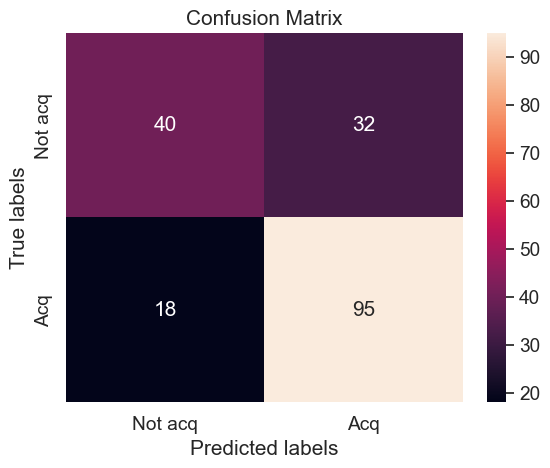

In [67]:
knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=5)
knn.fit(Xss_train,yss_train)

# Predict with model
y_pred_knn = knn.predict(Xss_test)

#Build Report and Confusion Matrix
print(f'Accuracy on test data: {accuracy_score(yss_test,y_pred_knn):.2f}', '\n')
print("Classification Report for Test Data")
print(classification_report(yss_test, y_pred_knn))
cf_matrix_knn_test = confusion_matrix(yss_test, y_pred_knn)

#Create confusion matrix for test 
ax= plt.subplot()
sns.heatmap(cf_matrix_knn_test, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not acq', 'Acq']); ax.yaxis.set_ticklabels(['Not acq', 'Acq']);

## 3. SVM Classifier

Accuracy on test data: 0.72 

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        72
           1       0.74      0.82      0.78       113

    accuracy                           0.72       185
   macro avg       0.71      0.69      0.69       185
weighted avg       0.71      0.72      0.71       185



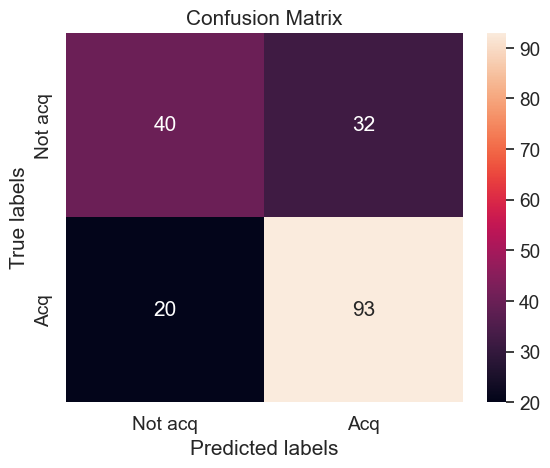

In [68]:
svm = SVC(kernel='linear')
svm.fit(Xss_train, yss_train)

# Predict using model:

y_pred_svm=svm.predict(Xss_test)

#Confusion matrix:

#Build Report and Confusion Matrix
print(f'Accuracy on test data: {accuracy_score(yss_test, y_pred_svm):.2f}', '\n')
print("Classification Report for Test Data")
print(classification_report(yss_test, y_pred_svm))
cf_matrix_svm_test = confusion_matrix(yss_test, y_pred_svm)

#Create confusion matrix for test 
ax= plt.subplot()
sns.heatmap(cf_matrix_svm_test, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not acq', 'Acq']); ax.yaxis.set_ticklabels(['Not acq', 'Acq']);

Accuracy on test data: 0.70 

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.64      0.54      0.59        72
           1       0.73      0.81      0.77       113

    accuracy                           0.70       185
   macro avg       0.69      0.67      0.68       185
weighted avg       0.70      0.70      0.70       185



/Users/eugeniomurillo/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


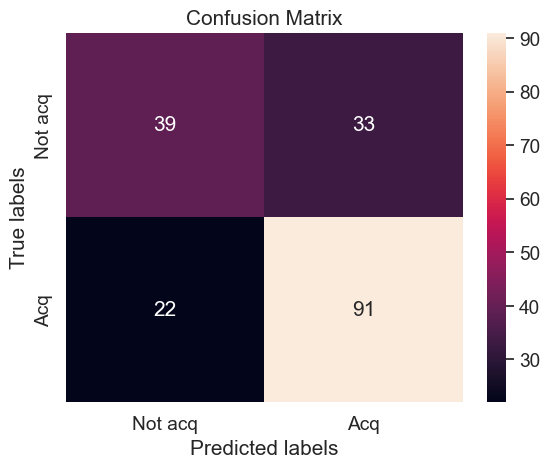

In [69]:
svm = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
svm.fit(Xss_train, yss_train)

# Predict using model:

y_pred_svm=svm.predict(Xss_test)

#Confusion matrix:

#Build Report and Confusion Matrix
print(f'Accuracy on test data: {accuracy_score(yss_test, y_pred_svm):.2f}', '\n')
print("Classification Report for Test Data")
print(classification_report(yss_test, y_pred_svm))
cf_matrix_svm_test = confusion_matrix(yss_test, y_pred_svm)

#Create confusion matrix for test 
ax= plt.subplot()
sns.heatmap(cf_matrix_svm_test, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not acq', 'Acq']); ax.yaxis.set_ticklabels(['Not acq', 'Acq']);

## 4. Random Forest

Accuracy on test data: 0.77 

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.80      0.56      0.66        72
           1       0.76      0.91      0.83       113

    accuracy                           0.77       185
   macro avg       0.78      0.73      0.74       185
weighted avg       0.78      0.77      0.76       185



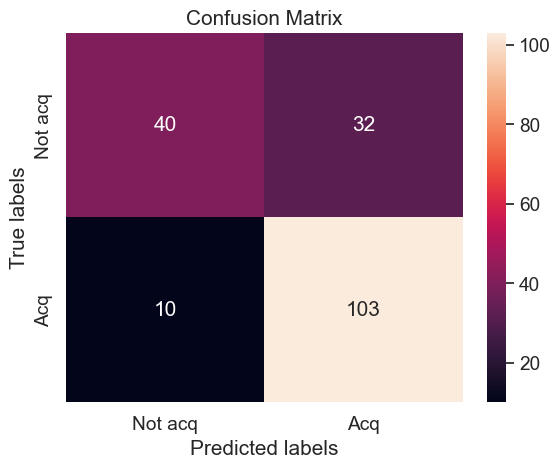

In [70]:
#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

#Predict using the model:

y_pred_rf = rf.predict(X_test)

#Confusion matrix:

#Build Report and Confusion Matrix
print(f'Accuracy on test data: {accuracy_score(y_test, y_pred_rf):.2f}', '\n')
print("Classification Report for Test Data")
print(classification_report(y_test, y_pred_rf))
cf_matrix_rf_test = confusion_matrix(y_test, y_pred_rf)

#Create confusion matrix for test 
ax= plt.subplot()
sns.heatmap(cf_matrix_rf_test, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not acq', 'Acq']); ax.yaxis.set_ticklabels(['Not acq', 'Acq']);

## 5. Gradient Boosting 

Accuracy on test data: 0.79 

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.87      0.56      0.68        72
           1       0.77      0.95      0.85       113

    accuracy                           0.79       185
   macro avg       0.82      0.75      0.76       185
weighted avg       0.81      0.79      0.78       185



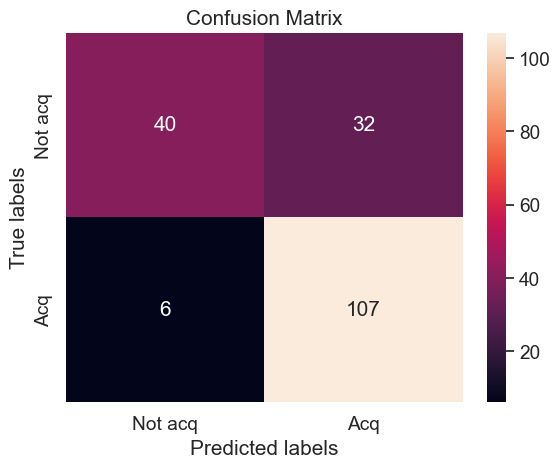

In [71]:
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_pred_gbc = gbc.predict(X_test)

#Build Report and Confusion Matrix
print(f'Accuracy on test data: {accuracy_score(y_test, y_pred_gbc):.2f}', '\n')
print("Classification Report for Test Data")
print(classification_report(y_test, y_pred_gbc))
cf_matrix_gbc_test = confusion_matrix(y_test, y_pred_gbc)

#Create confusion matrix for test 
ax= plt.subplot()
sns.heatmap(cf_matrix_gbc_test, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not acq', 'Acq']); ax.yaxis.set_ticklabels(['Not acq', 'Acq']);



In [72]:
#Check for feature weight
imp_features = gbc.feature_importances_
df_imp_features = pd.DataFrame({"features":list(X_train)}).join(pd.DataFrame({"weights":imp_features}))
df_imp_features_sorted=df_imp_features.sort_values(by=['weights'], ascending=False)

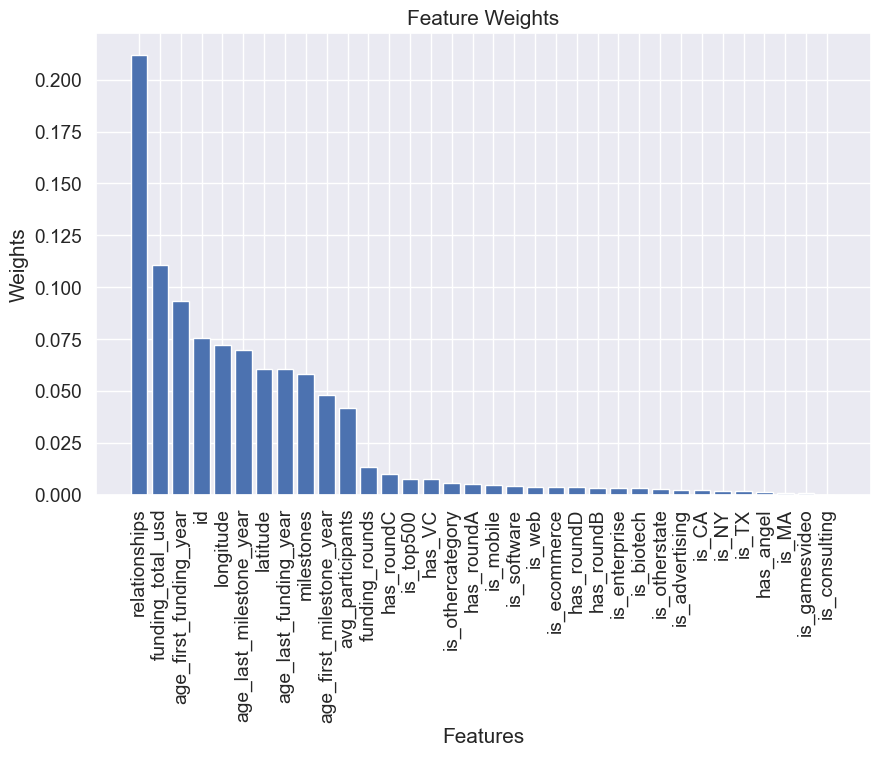

In [73]:
#Plot feature weights
plt.figure(figsize= (10,6))
plt.bar(df_imp_features_sorted['features'], df_imp_features_sorted['weights'])
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Feature Weights')
plt.xticks(rotation=90)
plt.show()

In [74]:
f1_scores = {'Log Reg': f1_score(yss_test,y_pred_logreg),
            'KNN': f1_score(yss_test,y_pred_knn),
            'SVM': f1_score(yss_test,y_pred_svm),
            'Random Forest': f1_score(y_test,y_pred_rf),
            'Gradient Boosting': f1_score(y_test,y_pred_gbc)}

f1_df = pd.DataFrame.from_dict(f1_scores, orient='index', columns=['f1_score'])
f1_df.reset_index(inplace=True)
f1_df.columns = ['Model', 'f1_score']
f1_df = f1_df.sort_values(by='f1_score', ascending=False)
f1_df

,Model,f1_score
4,Gradient Boosting,0.849206
3,Random Forest,0.830645
1,KNN,0.791667
0,Log Reg,0.778243
2,SVM,0.767932


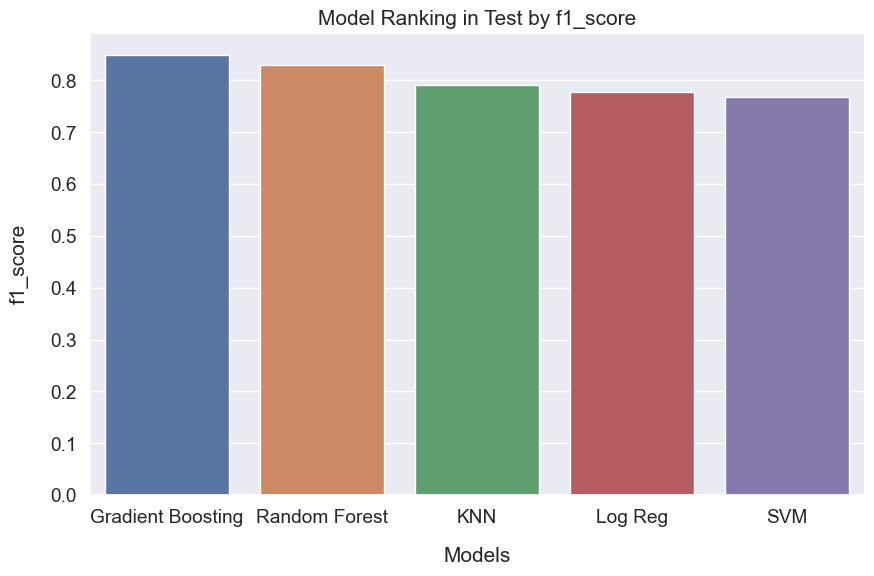

In [75]:
plt.figure(figsize= (10,6))
sns.barplot(data= f1_df, x='Model', y='f1_score' )
plt.xlabel('Models', labelpad= 15)
plt.ylabel('f1_score',labelpad= 15)
plt.title('Model Ranking in Test by f1_score')
plt.show()

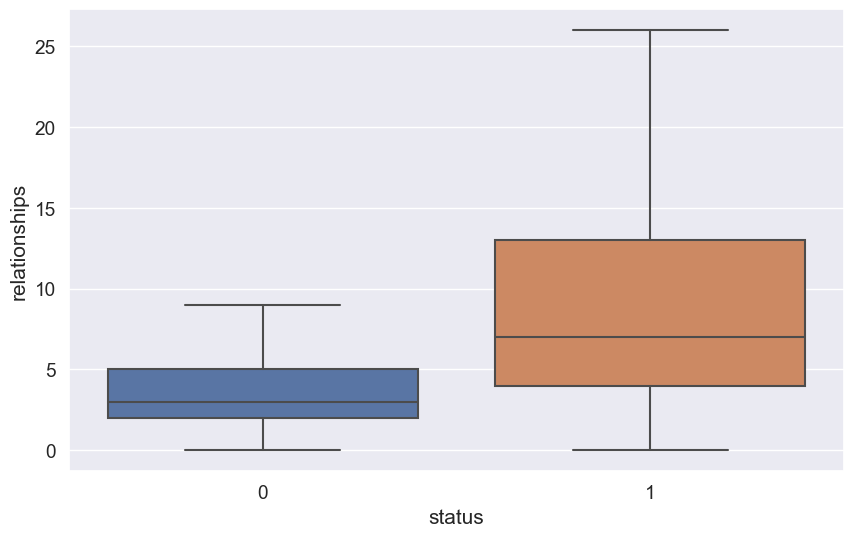

In [103]:
#Boxplot of top important feature #1 'relationships'
sns.set(font_scale=1.25)
plt.figure(figsize=(10,6))
sns.boxplot(y=df1['relationships'], x=df1['status'], showfliers=False)
plt.show()

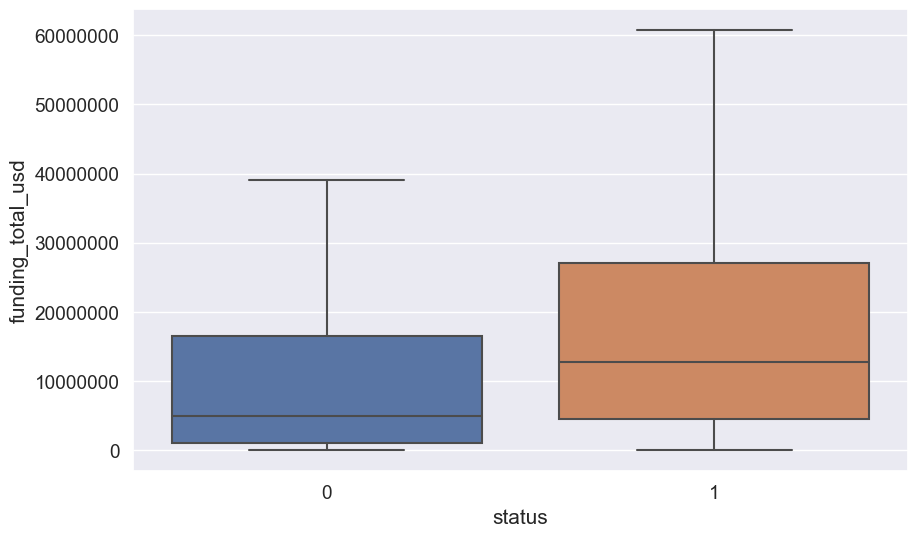

In [98]:
#Boxplot of top important feature #2 'relationships'
sns.set(font_scale=1.25)
plt.figure(figsize=(10,6))
sns.boxplot(y=df1['funding_total_usd'], x=df1['status'],showfliers=False )
plt.ticklabel_format(style='plain', axis='y')
plt.show()

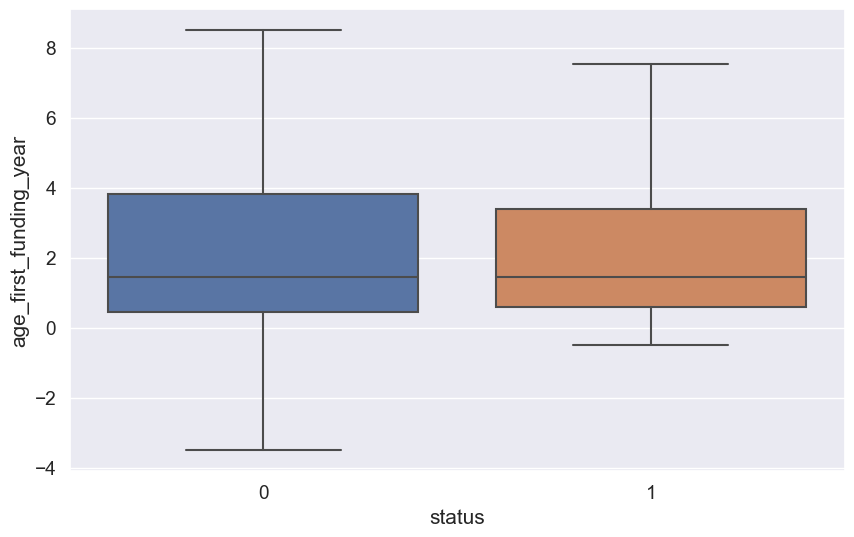

In [99]:
#Boxplot of top important feature #3 'relationships'
sns.set(font_scale=1.25)
plt.figure(figsize=(10,6))
sns.boxplot(y=df1['age_first_funding_year'], x=df1['status'],showfliers=False )
plt.ticklabel_format(style='plain', axis='y')
plt.show()